In [3]:
%pip install pandas plotnine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 0:00:00m eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 16.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import plotnine as p9

## Load Titanic Dataset

In [6]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Quick Plots with Plotnine: `qplot()`


```python
p9.qplot(
    data=  ,  # the dataframe to plot
    
    # "Geom": Kind of Plot
    geom=  ,  # string: the name of the geom to use 
              #    (e.g. "bar", "point", "rug", 'violin', 'text', 'histogram', 'density', etc)
              #    Full list at https://plotnine.readthedocs.io/en/stable/api.html#geoms
    
    # "Aesthetics" (usually mapped to Columns in the dataframe, specific to each geom)
    x=      , # str: the column to put on the x axis
    y=      , # str: the column for the y axis
    color=  , # str: a color, or the column to use for color
    fill=   , # str: a color, or the column to use for color
    size=   , # str or float: the column to use for size, or the size
    facets= , # str: the column to use for making subplots
    
    # Labels
    main=  ,  # str: title
    xlab=  ,  # str: x-axis label
    ylab=  ,  # str: y-axis label    
    
    # Axis Transforms
    xlim=  , # tuple: the x-axis limits, for example (1, 20)
    ylim=  , # tuple: the y-axis limits, for example (1, 20)
    log=   , # str: which axes to log-tranform ('x', 'y', or 'xy')
    asp=   , # float: set the aspect ratio of the figure
)
```

**Exercises**: Make the requested plots using the `qplot()` function (Note: Each geom is unique in terms of what data it needs.  you may need to reference the list of geoms at https://plotnine.readthedocs.io/en/stable/api.html#geoms)

Example:  Make a histogram of the ages of the passengers

/home/nickdg/miniconda3/envs/py10/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 22'. Pick better value with 'binwidth'.
/home/nickdg/miniconda3/envs/py10/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_bin : Removed 177 rows containing non-finite values.


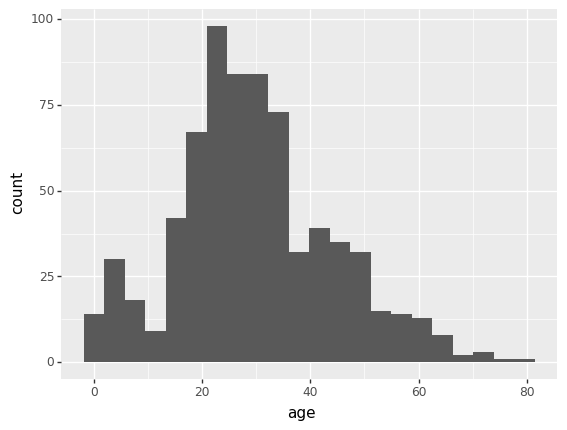

<ggplot: (8788705751140)>

In [170]:
p9.qplot(data=df, x='age', geom='histogram')

Make a density plot (a kind of smoothed histogram, with normalized values) of the ages of the passengers

How many people were in each class?  Use a bar geom to count the passengers (note: only need to specify x, like in the histogram and density plots)

Make a density plot of the passenger ages, with different-colored lines for each class.  

Make a histogram of the ages of the passengers, with different subplots ("facets") for each class. Put a title on the plot: "Passenger Ages by Class"

How many men, women, and children were in each class (tip: 'color' or 'fill')?

Make a boxplot or violin plot of the ages for each class.  Which do you prefer?

Make a point, rug, "smooth", or "density_2d" plot of ages vs fares for each class, using either color or size for the class.  Which do you prefer?

Make a point or jitter plot of the ages of the passengers in each class.  Which do you prefer?

## Combining Plots: Adding on More Geoms, Coordinate Transforms, etc

Want to add another geom to a plot, showing both the points and a box, for example?  No problem!  Adding new elements to a plot is done in `plotnine` using the addition operator: `+`.  While you can't add multiple qplots together, you can add on to a qplot any function that starts with `geom_`, `facet_`, `coord_`, `stat_`, `position_`, `scale_` or `theme_`:

For example: 

```python
p9.qplot(data=df, x='class', y='age', geom='boxplot') + p9.geom_jitter() + p9.coord_flip()
```

This often starts to get pretty long.  Lines can be broken up with different techniques (no standard practice seems to be there):

The backslash style:

```python
p9.qplot(data=df, x='class', y='age', geom='boxplot') \
 + p9.geom_jitter() \
 + p9.coord_flip()
```

The brackets style:

```python
(p9.qplot(data=df, x='class', y='age', geom='boxplot')
 + p9.geom_jitter()
 + p9.coord_flip()
)
```

The Variable style
```python
plot = p9.qplot(data=df, x='class', y='age', geom='boxplot')
plot += p9.geom_jitter()
plot += p9.coord_flip()
plot
```

Some modifications we will explore in this section: 

| Function Category | Description | List of Functions Link |
| :-- | :-- | :-- |
| `geom_xxx()` | Kinds of Geoms to use to represent the data | https://plotnine.readthedocs.io/en/stable/api.html#geoms |
| `coord_xxx()` | Coordinate transforms | https://plotnine.readthedocs.io/en/stable/api.html#coordinates |
| `theme_xxx()` | What visual themes to use (built-in themes, but new theme can also be created) | https://plotnine.readthedocs.io/en/stable/api.html#themes |




**Exercises**

Make a boxplot of class vs age, showing also the data points.  Flip the coordinates so make the boxplot horizontal.

Make a point plot showing the ages vs fares. Include a rug to highlight the distributions of the two variables and an abline to show the linear regression between them:

Make a bar plot showing how many poeple survived in each class (note: `df.astype({'survived': bool})`).  Make it in the theme of the fivethirtyeight website.

Make a horizontal violin plot in the black and while theme comparing class and age for each embark_town, showing the individual data points.